In [1]:
import sys, os
sys.path.append('..'); os.chdir('..')

In [2]:
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# 
# dataset_path = Path(r"/store/datasets/AffectiveComputing/Emodataset")
dataset_path = Path(r"C:\datasets/AffectiveComputing/Emodataset")
dataset_path.exists()

True

In [4]:
df_train = pd.read_csv(str(dataset_path / "train_labels.csv"), index_col=0)
df_test =  pd.read_csv(str(dataset_path / "test_labels.csv"), index_col=0)
print(df_train.head())
df_test.describe()

                    pth     label   valence   arousal
27490  image0032989.jpg      fear -0.451799  0.202165
25839  image0021114.jpg  surprise  0.546351  0.490314
14360     ffhq_3890.png     happy  0.785033  0.729019
14315      ffhq_385.png     happy  0.730200  0.326490
7185   image0038242.jpg  surprise  0.557352  0.964288


,valence,arousal
count,5393.000000,5393.000000
mean,-0.039577,0.446230
std,0.658544,0.301696
min,-0.899664,0.000095
25%,-0.609870,0.161360
50%,-0.444245,0.422330
75%,0.710497,0.704631
max,0.899641,0.999490


In [5]:
# modify dataframes
df_train["arousal_norm_minmax"] = df_train["arousal"] * 2 - 1
df_test["arousal_norm_minmax"] =  df_test["arousal"]  * 2 - 1

def norm_zscore(x):
    return (x - x.mean()) / (x.std() + 1e-8)

# in Dataset or collate
df_train["arousal_norm_zscore"] = norm_zscore(df_train["arousal"])
df_test["arousal_norm_zscore"] = norm_zscore(df_test["arousal"])

In [ ]:
# SAVE: save modified dataframes
df_train.to_csv(str(dataset_path / "train_labels_modified.csv"))
df_test.to_csv(str(dataset_path / "test_labels_modified.csv"))

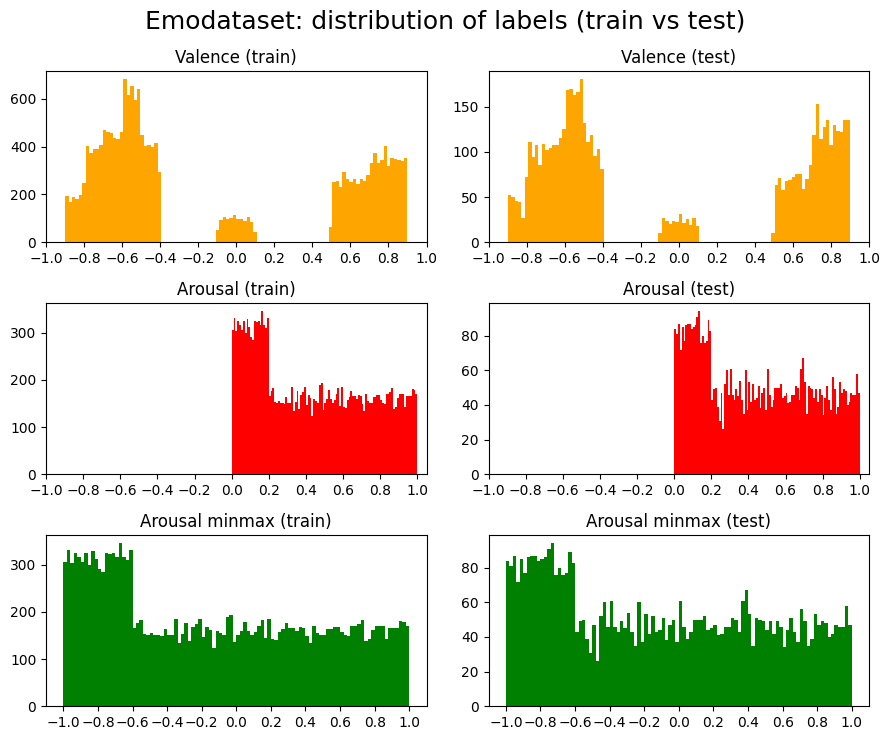

In [6]:
# plot valence and arousal histograms 
datum = [
    (df_train["valence"], "Valence (train)", "orange"),
    (df_test ["valence"], "Valence (test)",   "orange"),
    (df_train["arousal"], "Arousal (train)", "red"),
    (df_test ["arousal"], "Arousal (test)",   "red"),
    (df_train["arousal_norm_minmax"], "Arousal minmax (train)", "green"),
    (df_test ["arousal_norm_minmax"], "Arousal minmax (test)",   "green"),
    # (df_train["arousal_norm_zscore"], "Arousal z-score (train)", "green"),
    # (df_test ["arousal_norm_zscore"], "Arousal z-score (test)",   "green"),
]

nrows = int(len(datum)/2)
fig, ax = plt.subplots(ncols=2, nrows=nrows, figsize=(9,2.5*nrows))
plt.suptitle('Emodataset: distribution of labels (train vs test)', fontsize=18)

for axis, (data, title, color) in zip(ax.flatten(), datum):
    axis.hist(data, bins=100, color=color)
    axis.set_title(title)
    # axis.set_xlim(-1,1)
    axis.set_xticks(np.arange(-1,1.2,0.2))

plt.tight_layout()
plt.show()

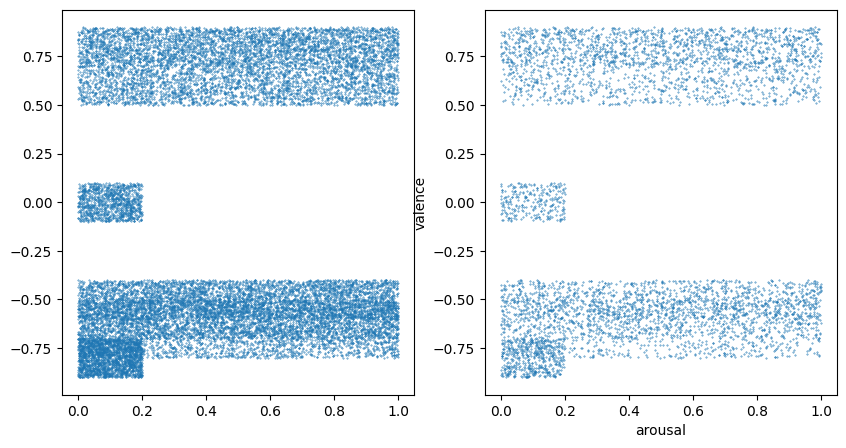

In [34]:
# plot valence-arousal scatter

fig, ax = plt.subplots(ncols=2, figsize=(10,5))

n = 20_000

ax[0].scatter(df_train['arousal'][:n], df_train['valence'][:n], marker='.', s=0.5)
ax[1].scatter(df_test['arousal'][:n], df_test['valence'][:n], marker='.', s=0.5)
ax[1].set_xlabel('arousal')
ax[1].set_ylabel('valence')

plt.show()

In [ ]:
# extract label number
CANONICAL_8 = ["neutral","happy","sad","surprise","fear","disgust","anger","contempt"]
CANONICAL_8_dict = { label: idx for idx, label in enumerate(CANONICAL_8) }

df_train["label_idx"] = df_train["label"].apply(lambda x: CANONICAL_8_dict[x])
df_test["label_idx"] =  df_test["label"].apply(lambda x:  CANONICAL_8_dict[x])

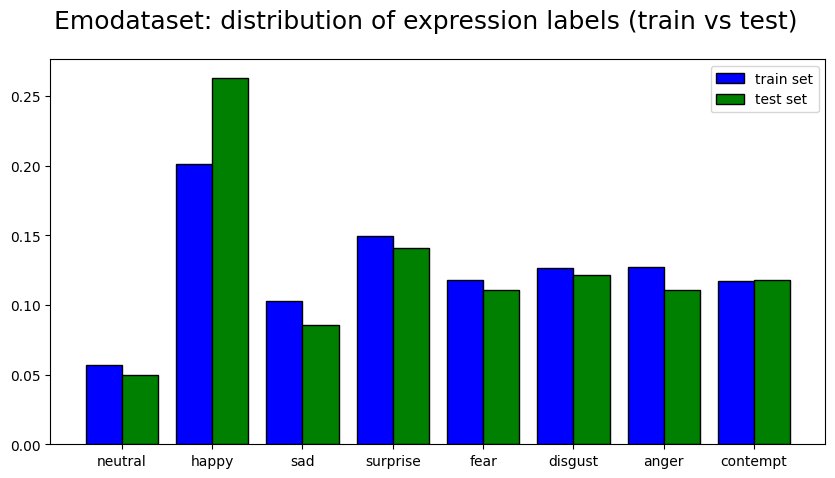

In [89]:
# PLOT: expressions histograms

train_values, _ = np.histogram(df_train["label_idx"], bins=8)
test_values, _ = np.histogram(df_test["label_idx"], bins=8)

train_values = train_values.astype('float64') / train_values.sum()
test_values  = test_values.astype('float64')  / test_values.sum()

x_ticks = np.arange(len(train_values))
wid = 0.4

fig, ax = plt.subplots(figsize=(10,5))

ax.bar(x_ticks-wid/2, train_values, wid, color='blue', edgecolor='black', label='train set')
ax.bar(x_ticks+wid/2, test_values, wid, color='green', edgecolor='black', label='test set')

ax.set_xticks(x_ticks)
ax.set_xticklabels(CANONICAL_8)

plt.suptitle("Emodataset: distribution of expression labels (train vs test)", fontsize=18)
plt.legend()
plt.show()

In [82]:
train_values.sum()

np.int64(19223)